# G20 Renewable energy analysis (1990-2019) and the effect on greenhouse gas emissions

#### Does increasing consumption of renewable energy have effect on greenhouse gas emissions?

Renewable energy is as hot of a topic as it ever has been, and not only because of global warming (pun intended, unfortunately). The latest report of the Intergovernmental Panel on Climate Change (IPCC) does not beat around the bush. If we do not make haste with the renewable energy transition, there will be grave, irreversible consequences. The war in Ukraine adds fuel to the discussion: not only is it beneficial for the climate to promote consumption of energy from renewable sources: it turns out that the international reliance on fossil fuels had great effects on geopolitics, with long lasting consequences. 

All the more reason to make haste with the transition to a renewable energy based society. From a climate perspective, it is only the question if a growth in renewable energy consumption is enough to slow the release of greenhouse gasses to the atmosphere. After all, the production of energy is not the only factor that comes in to play. Agriculture, land use and forestry have an effect as well (EPA, 2022).

In this analysis, the fraction of renewable energy consumption as part of the total energy consumption of the G20 countries will be plotted over time. The data of the following set will be used: Renewable energy from OECD (OECD, 2022) and primary energy supply (OECD, 2022). After the fraction of renewable energy consumption over time has been established, the change in relative renewable energy consumption of the G20 countries between 1990 and 2019 will be plotted in a bar chart against the increase in emission of greenhouse gasses.

The following assumptions are applicable for this analysis:


#### Assumptions and constants: 


In [300]:
pd.set_option("display.max_colwidth", None)

data = {
    "Assumption":['Europe (As part of G20)', "Renewable energy including"],
    "Unit":["EU28 and EU27 (with or withour UK) considered equal", "Hydro, geothermal, solar, wind, tide, wave/n and derivatives from solid biofuels, biogasoline, biodiesels, other liquid biofuels, biogases and the renewable fraction of municipal waste (nuclear not included)"],
}

data1 = {
    "Measurement":['Energy Consumption', "Greenhouse gas emissions",],
    "Unit":["Mln toe (tonnes of oil equivalent)", "CO2eq (carbon dioxide equivalent)",]
}

df = pd.DataFrame(data)
df1 = pd.DataFrame(data1)

df 

,Assumption,Unit
0,Europe (As part of G20),EU28 and EU27 (with or withour UK) considered equal
1,Renewable energy including,"Hydro, geothermal, solar, wind, tide, wave/n and derivatives from solid biofuels, biogasoline, biodiesels, other liquid biofuels, biogases and the renewable fraction of municipal waste (nuclear not included)"


In [301]:
df1

,Measurement,Unit
0,Energy Consumption,Mln toe (tonnes of oil equivalent)
1,Greenhouse gas emissions,CO2eq (carbon dioxide equivalent)


## Setup and data loading

In [302]:
import country_converter as coco
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio

import plotly
import plotly.express as px

In [303]:
renewable_energy_world = pd.read_csv('OECD World renewable energy total toe.csv')
renewable_energy_world.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,RENEWABLE,TOT,KTOE,A,1990,5074.1807,NaN
1,AUS,RENEWABLE,TOT,KTOE,A,1991,5192.7868,NaN
2,AUS,RENEWABLE,TOT,KTOE,A,1992,4728.0357,NaN
3,AUS,RENEWABLE,TOT,KTOE,A,1993,5482.5403,NaN
4,AUS,RENEWABLE,TOT,KTOE,A,1994,5382.1582,NaN


## Cleaning the data: renewable energies

#### Only the following columns are kept: Location, Time and Value. The dataframe is pivoted in the right format and the G20 countries are filtered from the dataset.

In [304]:
renewable_energy_world = renewable_energy_world[['LOCATION', 'TIME', 'Value']]
pivoted_renewable_energy_world = renewable_energy_world.pivot(index='LOCATION', columns='TIME', values='Value').reset_index()
pivoted_renewable_energy_world

TIME,LOCATION,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AGO,4.384924e+03,4.489782e+03,4.598715e+03,4.708345e+03,4.806105e+03,4.852680e+03,4.889558e+03,4.911866e+03,4.950774e+03,...,5.951916e+03,6.074692e+03,6.150812e+03,6.331427e+03,6.447373e+03,6.541745e+03,6.691913e+03,6.942319e+03,7.119776e+03,NaN
1,ALB,6.079058e+02,6.655155e+02,6.404080e+02,6.314464e+02,6.549775e+02,6.771615e+02,7.936515e+02,7.199245e+02,6.976354e+02,...,8.623579e+02,5.750023e+02,6.245821e+02,8.117512e+02,6.376046e+02,7.538498e+02,9.515348e+02,6.467254e+02,1.019617e+03,749.0506
2,ARE,0.000000e+00,0.000000e+00,3.236840e+01,2.648320e+01,2.354070e+01,2.354070e+01,1.765550e+01,1.765550e+01,1.691980e+01,...,4.780740e+01,4.936460e+01,4.945060e+01,6.312700e+01,1.138770e+02,1.132272e+02,1.170871e+02,1.527040e+02,1.972043e+02,NaN
3,ARG,3.113032e+03,3.089677e+03,3.378518e+03,3.873431e+03,4.170245e+03,4.299914e+03,3.961593e+03,4.311947e+03,4.281666e+03,...,5.313151e+03,5.475920e+03,5.428189e+03,5.943245e+03,6.004581e+03,6.095051e+03,5.982335e+03,6.633086e+03,6.575627e+03,NaN
4,ARM,1.487054e+02,1.478122e+02,2.763543e+02,3.833907e+02,3.160743e+02,1.786424e+02,1.485908e+02,1.327983e+02,1.453186e+02,...,2.288334e+02,2.227286e+02,2.084790e+02,1.956912e+02,2.055173e+02,2.854871e+02,3.306835e+02,3.307688e+02,3.010395e+02,304.9771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,WLD,1.115780e+06,1.134700e+06,1.150838e+06,1.163395e+06,1.180370e+06,1.206406e+06,1.225506e+06,1.237018e+06,1.250027e+06,...,1.579937e+06,1.606080e+06,1.662696e+06,1.715349e+06,1.743312e+06,1.771789e+06,1.827604e+06,1.875302e+06,1.930789e+06,NaN
138,YEM,7.738610e+01,7.738610e+01,7.738610e+01,7.738610e+01,7.738610e+01,7.738610e+01,7.738610e+01,7.738610e+01,7.738610e+01,...,1.031146e+02,1.060285e+02,1.090762e+02,1.121477e+02,1.155871e+02,1.272810e+02,1.334480e+02,1.395094e+02,1.660647e+02,NaN
139,ZAF,1.050073e+04,1.079909e+04,1.086030e+04,1.099962e+04,1.129437e+04,1.148636e+04,1.174875e+04,1.200118e+04,1.217155e+04,...,9.352274e+03,9.101366e+03,8.687370e+03,8.330524e+03,8.314713e+03,8.467832e+03,8.744502e+03,8.995456e+03,9.230340e+03,NaN
140,ZMB,4.730620e+03,4.925031e+03,4.815721e+03,5.058589e+03,5.162119e+03,5.262625e+03,5.275494e+03,5.444483e+03,5.526951e+03,...,8.079225e+03,8.419170e+03,8.783797e+03,9.135727e+03,9.476144e+03,9.644029e+03,9.742166e+03,1.013802e+04,1.052303e+04,NaN


#### To filter out the G20 countries out of the total data set, the location codes used in the set will be converted to the actual country names. The following library is used: CountryConverter.

In [305]:
g20_countries = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'EU28','India', 'Indonesia', 'Italy', 'Japan', 'South Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'European Union']

In [306]:
converter = coco.CountryConverter()

In [307]:
pivoted_renewable_energy_world.LOCATION = converter.convert(names=pivoted_renewable_energy_world.LOCATION, src='ISO3', to='name_short', not_found=None)

EU27_2020 not found in ISO3
EU28 not found in ISO3
G20 not found in ISO3
OEU not found in ISO3
WLD not found in ISO3


#### Sort values (based on the renewable energy consumption in 2018 (This data is most recent and complete)

In [308]:
pivoted_renewable_energy_g20 = pivoted_renewable_energy_world[pivoted_renewable_energy_world.LOCATION.isin(g20_countries)]
pivoted_renewable_energy_g20.set_index('LOCATION', inplace=True)
pivoted_renewable_energy_g20 = pivoted_renewable_energy_g20.reindex(index=pivoted_renewable_energy_g20.sort_values(2018, ascending=False).index)
pivoted_renewable_energy_g20

TIME,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
LOCATION,,,,,,,,,,,,,,,,,,,,,
China,211374.1903,213205.2833,215018.6635,217790.5847,219657.4282,222456.2195,222181.9051,223476.9561,222472.5232,221624.0327,...,206579.6935,203011.3500,216804.2515,225864.0777,242949.0493,254265.9453,266160.5188,279310.0340,295426.8634,NaN
EU28,72122.2824,75177.1350,77144.5893,81710.1806,82515.0094,84593.4505,88491.1223,91883.6809,94389.7865,94754.2122,...,178608.3598,175221.2133,193236.9993,203879.3091,205145.6916,212581.5740,216161.8815,221795.6180,229606.7589,236902.2557
India,139655.5795,141587.9764,143202.5509,144002.6560,145813.3228,146338.9844,147396.1833,149348.4047,151526.5167,153854.0269,...,197776.3781,208241.0911,204613.0364,203542.1133,199892.0798,195627.5054,205426.5213,205278.8114,207723.8487,NaN
United States,96174.7540,99168.2050,103924.3479,100856.8943,100108.3584,104853.8527,110193.6252,106066.7395,105019.3192,103365.4270,...,125874.5329,135225.1128,138130.7439,148137.3940,152531.6591,149656.4302,155087.3500,162450.0176,172385.0877,174468.1806
Brazil,65538.4044,65936.4369,65779.7210,66669.8115,70051.2327,69430.8711,70425.2016,72924.5741,73640.0593,75195.8031,...,116836.6783,115265.8833,114847.2961,116083.9365,117427.5953,120353.4238,122005.3515,123638.7266,128864.0641,133460.2421
Indonesia,45948.4667,46770.4404,47792.5146,48497.1434,50466.7765,51575.6282,52203.0191,53204.4760,53934.2458,54274.2859,...,63633.2426,61134.8572,59245.7581,58163.6716,58123.9753,55659.8165,57032.6312,59230.4760,59398.4135,48129.1041
Canada,36327.1901,37303.5396,38080.0420,38745.1420,40750.4873,41661.8992,42689.6723,42317.5313,41410.1652,43270.7032,...,44111.9807,46571.6202,47242.3332,49509.2243,49441.9749,49672.6666,49097.3537,50572.5279,49849.5700,49455.3930
Germany,5313.4327,5069.4612,5365.7780,5478.9530,5777.9545,5976.8415,6164.5457,7122.1552,7684.8191,7964.1109,...,30757.0343,31852.1844,35785.3853,36881.4335,36625.3975,39025.4900,38853.0810,41446.8485,41885.0377,44019.0946
Italy,6472.4182,7510.5618,7921.6014,7975.3989,8253.8358,7719.2462,8354.8391,8654.6670,9043.4270,9773.4069,...,21864.3387,21025.8446,23884.7520,26370.6621,26512.2331,26268.6983,26017.9272,26170.7037,26685.5639,26916.5855


#### Let's change the unit of energy from KToe to Mln Toe by dividing by 1000. We will also change the name 'EU28' to 'Europe' (It is considered the same in this analysis). We can see from the data below that there are some instances missing from the year 2020, but this is no problem.

In [309]:
pivoted_renewable_energy_g20 = pivoted_renewable_energy_g20.div(1000)

In [310]:
pivoted_renewable_energy_g20 = pivoted_renewable_energy_g20.rename(index={'EU28': 'Europe'})

In [311]:
pivoted_renewable_energy_g20.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990 to 2019
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   China           29 non-null     float64
 1   Europe          30 non-null     float64
 2   India           29 non-null     float64
 3   United States   30 non-null     float64
 4   Brazil          30 non-null     float64
 5   Indonesia       30 non-null     float64
 6   Canada          30 non-null     float64
 7   Germany         30 non-null     float64
 8   Italy           30 non-null     float64
 9   France          30 non-null     float64
 10  Japan           30 non-null     float64
 11  Russia          30 non-null     float64
 12  Turkey          30 non-null     float64
 13  United Kingdom  30 non-null     float64
 14  Mexico          30 non-null     float64
 15  South Africa    29 non-null     float64
 16  Australia       30 non-null     float64
 17  Argentina       29 non-null     float

In [312]:
fig = px.line(pivoted_renewable_energy_g20.T, 
              title="G20: Renewable energy consumption between 1990-2020 (absolute)",
             labels={
                 "TIME":"Year",
                 "value":"Mln Toe"
             })
fig.show()

# Total energy consumption

#### To find out how much the relative consumption of renewable energy has changed over the years, it is necessary to create the dataframe for total energy consumption, as well as the renewable energy consumption. The data is plotted below.

In [314]:
total_energy_world = pd.read_csv('OECD World primary energy total toe.csv')
total_energy_world

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PRYENRGSUPPLY,TOT,MLN_TOE,A,1990,86.14,NaN
1,AUS,PRYENRGSUPPLY,TOT,MLN_TOE,A,1991,85.12,NaN
2,AUS,PRYENRGSUPPLY,TOT,MLN_TOE,A,1992,86.70,NaN
3,AUS,PRYENRGSUPPLY,TOT,MLN_TOE,A,1993,91.19,NaN
4,AUS,PRYENRGSUPPLY,TOT,MLN_TOE,A,1994,91.30,NaN
...,...,...,...,...,...,...,...,...
4285,EU27_2020,PRYENRGSUPPLY,TOT,MLN_TOE,A,2015,1408.97,NaN
4286,EU27_2020,PRYENRGSUPPLY,TOT,MLN_TOE,A,2016,1419.46,NaN
4287,EU27_2020,PRYENRGSUPPLY,TOT,MLN_TOE,A,2017,1443.60,NaN
4288,EU27_2020,PRYENRGSUPPLY,TOT,MLN_TOE,A,2018,1429.93,NaN


#### Again, only the following columns are kept: Location, Time and Value. The dataframe is pivoted in the right format and the G20 countries are filtered from the dataset.

In [315]:
total_energy_world = total_energy_world[['LOCATION', 'TIME', 'Value']]
pivoted_total_energy_world = total_energy_world.pivot(index='LOCATION', columns='TIME', values='Value').reset_index()
pivoted_total_energy_world

TIME,LOCATION,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AGO,5.88,6.03,6.06,6.27,6.36,6.30,6.43,6.51,6.43,...,11.22,11.63,13.08,13.18,17.39,15.29,13.60,13.06,15.03,14.92
1,ALB,2.67,1.87,1.36,1.33,1.42,1.33,1.42,1.21,1.34,...,2.13,2.23,2.00,2.33,2.34,2.20,2.26,2.36,2.34,2.33
2,ARE,20.39,23.46,22.34,23.49,26.03,27.66,29.22,30.83,31.55,...,61.45,60.36,64.03,67.55,74.08,80.30,88.64,69.10,63.31,52.63
3,ARG,43.88,45.68,46.99,48.41,52.38,52.28,53.99,55.74,59.37,...,74.67,77.15,79.37,81.41,81.53,82.76,82.32,82.35,79.98,79.44
4,ARM,7.71,8.13,4.13,2.19,1.38,1.64,1.78,1.86,1.90,...,2.48,2.72,2.97,2.90,3.15,3.26,3.12,3.29,3.15,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,WLD,8737.67,8792.53,8798.80,8889.20,8957.89,9184.58,9417.00,9513.78,9563.17,...,12813.39,13013.50,13172.18,13364.32,13541.36,13574.15,13681.74,13973.42,14323.17,14485.75
139,YEM,2.51,3.06,3.34,2.89,3.02,3.42,3.49,3.71,3.96,...,7.81,6.63,5.99,8.26,7.85,3.74,3.22,3.20,3.21,4.16
140,ZAF,89.72,92.19,87.87,93.69,98.17,103.55,106.59,108.67,110.76,...,134.44,136.91,130.97,129.86,137.62,128.82,134.93,135.91,134.71,140.13
141,ZMB,5.43,5.59,5.68,5.69,5.73,5.83,5.78,6.03,6.09,...,8.02,8.42,8.82,9.08,9.45,9.68,9.94,10.43,10.73,10.50


#### To filter out the G20 countries out of the total data set, the location codes used in the set will be converted to the actual country names. The following library is used: CountryConverter.

In [316]:
pivoted_total_energy_world.LOCATION = converter.convert(names=pivoted_total_energy_world.LOCATION, src='ISO3', to='name_short', not_found=None)

EU27_2020 not found in ISO3
EU28 not found in ISO3
G20 not found in ISO3
OECD not found in ISO3
OEU not found in ISO3
WLD not found in ISO3


In [317]:
pivoted_total_energy_g20 = pivoted_total_energy_world[pivoted_total_energy_world.LOCATION.isin(g20_countries)]
pivoted_total_energy_g20.set_index('LOCATION', inplace=True)
pivoted_total_energy_g20

TIME,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
LOCATION,,,,,,,,,,,,,,,,,,,,,
Argentina,43.88,45.68,46.99,48.41,52.38,52.28,53.99,55.74,59.37,60.86,...,74.67,77.15,79.37,81.41,81.53,82.76,82.32,82.35,79.98,79.44
Australia,86.14,85.12,86.70,91.19,91.30,92.51,98.96,101.28,103.92,106.19,...,126.24,126.97,125.58,127.39,126.76,126.59,126.39,127.88,128.72,128.74
Brazil,140.44,143.10,144.60,148.22,156.04,161.38,169.97,178.64,182.95,187.27,...,267.54,270.82,281.52,294.55,303.79,297.63,286.73,292.33,288.19,292.71
Canada,211.28,210.77,215.73,222.89,230.79,233.89,238.53,241.03,239.83,246.46,...,260.78,266.62,268.74,274.15,281.39,279.88,290.50,302.48,306.77,305.59
China,873.64,848.00,876.83,928.80,972.77,1044.45,1073.47,1073.05,1078.41,1098.61,...,2536.20,2722.11,2819.88,2910.74,2984.81,2998.56,2980.92,3092.86,3242.00,3389.30
Germany,351.23,344.32,337.90,334.61,333.02,336.50,347.92,344.84,342.76,334.98,...,329.55,312.42,314.74,321.47,307.28,308.84,310.06,311.05,303.56,294.33
EU28,1645.30,1647.47,1608.41,1607.79,1600.76,1647.86,1704.88,1688.28,1698.31,1683.83,...,1730.50,1667.68,1654.43,1636.02,1571.95,1590.72,1598.85,1620.16,1605.86,1573.61
France,223.84,236.60,232.53,236.39,227.43,236.88,250.30,242.63,249.70,249.29,...,262.86,257.85,257.69,258.78,248.78,252.50,247.72,247.55,246.32,242.48
United Kingdom,205.94,212.93,212.17,214.33,216.06,216.39,225.71,219.32,221.52,222.07,...,203.67,188.83,193.86,191.04,179.97,181.75,179.39,176.55,175.92,170.66


#### We will once again change the name 'EU28' to 'Europe' (It is considered the same in this analysis). We can see in the Non-Null Count below that no data is missing.

In [318]:
pivoted_total_energy_g20 = pivoted_total_energy_g20.rename(index={'EU28': 'Europe'})

In [319]:
pivoted_total_energy_g20.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990 to 2019
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Argentina       30 non-null     float64
 1   Australia       30 non-null     float64
 2   Brazil          30 non-null     float64
 3   Canada          30 non-null     float64
 4   China           30 non-null     float64
 5   Germany         30 non-null     float64
 6   Europe          30 non-null     float64
 7   France          30 non-null     float64
 8   United Kingdom  30 non-null     float64
 9   Indonesia       30 non-null     float64
 10  India           30 non-null     float64
 11  Italy           30 non-null     float64
 12  Japan           30 non-null     float64
 13  South Korea     30 non-null     float64
 14  Mexico          30 non-null     float64
 15  Russia          30 non-null     float64
 16  Saudi Arabia    30 non-null     float64
 17  Turkey          30 non-null     float

In [320]:
fig = px.line(pivoted_total_energy_g20.reindex(index = pivoted_renewable_energy_g20.index).T, 
              title="G20: Total energy consumption between 1990-2020 (absolute)",
             labels={
                 "TIME":"Year",
                 "value":"Mln Toe"
             })
fig.show()

# Division to determine the relative renewable energy consumption

In [322]:
fraction_renewable_energy_g20 = pivoted_renewable_energy_g20.div(pivoted_total_energy_g20)
fraction_renewable_energy_g20 = fraction_renewable_energy_g20.sort_values(2018, ascending=False)

In [323]:
fig = px.line(fraction_renewable_energy_g20.T, 
              title="G20: Renewable energy consumption between 1990-2020 (RELATIVE)",
             labels={
                 "TIME":"Year",
                 "value":"Fraction"
             })
fig.show()

## Determining increase/decrease in relative renewable energy consumption

#### A new column is added to the manufactured dataframe: Difference 1990-2018 (%-points). The outcome will be combined in the final barplot of the analysis.

In [207]:
fraction_renewable_energy_g20['Difference 1990-2018 (%-points)'] = (fraction_renewable_energy_g20[2018]-fraction_renewable_energy_g20[1990])*100

In [208]:
print(fraction_renewable_energy_g20['Difference 1990-2018 (%-points)'].sort_values(ascending=False))

LOCATION
Italy             13.307106
Germany           12.285136
United Kingdom    10.289316
Europe             9.914522
France             3.590571
United States      2.754732
Japan              2.449031
Australia          1.147210
Argentina          1.127169
South Korea        0.861590
Saudi Arabia      -0.011288
Russia            -0.497966
Canada            -0.944042
Brazil            -1.951513
Mexico            -3.387192
South Africa      -4.851878
Turkey            -5.497652
China            -15.082168
Indonesia        -20.933305
India            -27.423522
Name: Difference 1990-2018 (%-points), dtype: float64


# Greenhouse gas emission analysis

In [209]:
emissions_world = pd.read_csv('Our world in data all greenhouse emissions (CO2equivalent).csv')
emissions_world

,Entity,Code,Year,Total including LUCF
0,Afghanistan,AFG,1990,12790000.0
1,Afghanistan,AFG,1991,12710000.0
2,Afghanistan,AFG,1992,11250000.0
3,Afghanistan,AFG,1993,11080000.0
4,Afghanistan,AFG,1994,10880000.0
...,...,...,...,...
5646,Zimbabwe,ZWE,2014,40840000.0
5647,Zimbabwe,ZWE,2015,42890000.0
5648,Zimbabwe,ZWE,2016,116520000.0
5649,Zimbabwe,ZWE,2017,116090000.0


In [210]:
g20_countries_for_emissions = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'European Union (27)','India', 'Indonesia', 'Italy', 'Japan', 'South Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States']

In [211]:
emissions_world = emissions_world[['Entity', 'Year', 'Total including LUCF']]
pivoted_emissions_world = emissions_world.pivot(index='Entity', columns='Year', values='Total including LUCF').reset_index()
pivoted_emissions_world

Year,Entity,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,1.279000e+07,1.271000e+07,1.125000e+07,1.108000e+07,1.088000e+07,1.109000e+07,1.205000e+07,1.295000e+07,1.371000e+07,...,3.708000e+07,4.503000e+07,5.841000e+07,6.650000e+07,7.455000e+07,8.437000e+07,9.348000e+07,9.553000e+07,9.745000e+07,9.908000e+07
1,Albania,1.151000e+07,9.150000e+06,7.090000e+06,7.030000e+06,7.870000e+06,7.630000e+06,7.360000e+06,6.650000e+06,6.880000e+06,...,7.730000e+06,8.010000e+06,8.790000e+06,8.400000e+06,8.600000e+06,9.080000e+06,9.010000e+06,9.490000e+06,1.006000e+07,9.840000e+06
2,Algeria,9.567000e+07,9.454000e+07,9.416000e+07,1.017000e+08,9.945000e+07,1.036600e+08,1.049900e+08,1.090800e+08,1.144200e+08,...,1.704900e+08,1.716300e+08,1.794100e+08,1.893800e+08,1.933900e+08,2.035300e+08,2.114600e+08,2.100300e+08,2.123300e+08,2.191100e+08
3,Andorra,4.300000e+05,4.300000e+05,4.300000e+05,4.400000e+05,4.400000e+05,4.600000e+05,4.900000e+05,5.100000e+05,5.400000e+05,...,6.200000e+05,6.300000e+05,6.000000e+05,6.000000e+05,5.900000e+05,5.800000e+05,5.800000e+05,5.900000e+05,5.900000e+05,5.900000e+05
4,Angola,6.518000e+07,6.585000e+07,6.617000e+07,6.696000e+07,6.710000e+07,7.147000e+07,7.333000e+07,7.174000e+07,7.962000e+07,...,1.283400e+08,1.333500e+08,1.335400e+08,1.332100e+08,1.354100e+08,1.365000e+08,1.390900e+08,1.388500e+08,1.373200e+08,1.245900e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,1.170000e+06,4.030000e+06,6.540000e+06,1.323000e+07,1.885000e+07,2.503000e+07,3.287000e+07,4.065000e+07,5.184000e+07,...,2.596200e+08,2.777400e+08,2.358200e+08,2.363800e+08,2.487800e+08,2.617800e+08,3.053200e+08,3.302100e+08,3.283300e+08,3.644300e+08
191,World,3.264591e+10,3.281346e+10,3.267032e+10,3.276649e+10,3.297747e+10,3.370346e+10,3.406891e+10,3.538789e+10,3.492919e+10,...,4.302901e+10,4.475858e+10,4.489140e+10,4.542761e+10,4.604713e+10,4.664729e+10,4.676047e+10,4.741395e+10,4.799047e+10,4.893971e+10
192,Yemen,1.237000e+07,1.402000e+07,1.480000e+07,1.392000e+07,1.430000e+07,1.582000e+07,1.648000e+07,1.782000e+07,1.924000e+07,...,3.697000e+07,3.561000e+07,3.239000e+07,3.147000e+07,3.835000e+07,3.881000e+07,2.605000e+07,2.274000e+07,2.197000e+07,2.176000e+07
193,Zambia,7.742000e+07,7.695000e+07,7.627000e+07,7.499000e+07,7.343000e+07,7.094000e+07,5.995000e+07,5.816000e+07,5.715000e+07,...,6.211000e+07,6.823000e+07,8.269000e+07,8.673000e+07,8.817000e+07,8.904000e+07,9.432000e+07,9.351000e+07,9.387000e+07,9.323000e+07


In [212]:
pivoted_emissions_g20 = pivoted_emissions_world[pivoted_emissions_world.Entity.isin(g20_countries_for_emissions)]
pivoted_emissions_g20.set_index('Entity', inplace=True)
pivoted_emissions_g20 = pivoted_emissions_g20.rename(index={'European Union (27)': 'Europe'})
pivoted_emissions_g20

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Entity,,,,,,,,,,,,,,,,,,,,,
Argentina,2.883700e+08,2.933600e+08,2.977600e+08,3.002700e+08,3.053500e+08,3.059300e+08,3.198100e+08,3.223400e+08,3.261500e+08,3.322400e+08,...,4.240700e+08,4.298100e+08,4.106400e+08,4.148400e+08,4.247000e+08,4.217600e+08,4.283700e+08,3.962700e+08,3.977000e+08,3.955000e+08
Australia,5.582100e+08,5.581300e+08,5.603000e+08,5.599800e+08,5.630600e+08,5.711900e+08,5.710100e+08,5.822800e+08,6.080800e+08,6.436000e+08,...,6.338000e+08,6.011400e+08,6.447400e+08,6.431200e+08,5.552600e+08,5.662100e+08,5.664700e+08,5.773200e+08,6.230800e+08,6.192600e+08
Brazil,1.642290e+09,1.669560e+09,1.679500e+09,1.689700e+09,1.706030e+09,1.726080e+09,1.735710e+09,1.766320e+09,1.800620e+09,1.810510e+09,...,2.008850e+09,2.104610e+09,1.270590e+09,1.311580e+09,1.335020e+09,1.372790e+09,1.354280e+09,1.443980e+09,1.461430e+09,1.420580e+09
Canada,6.263600e+08,6.222900e+08,6.382200e+08,6.362500e+08,6.568200e+08,6.725300e+08,6.968800e+08,7.095700e+08,7.261000e+08,7.237500e+08,...,9.624600e+08,9.758400e+08,8.252400e+08,8.300700e+08,8.412100e+08,8.481200e+08,8.446700e+08,7.311100e+08,7.457400e+08,7.634400e+08
China,2.873710e+09,3.023380e+09,3.154540e+09,3.377790e+09,3.528810e+09,3.918300e+09,3.954750e+09,3.963610e+09,4.103230e+09,4.053370e+09,...,9.046190e+09,9.872370e+09,1.036483e+10,1.069004e+10,1.114476e+10,1.115576e+10,1.114968e+10,1.120766e+10,1.140826e+10,1.170581e+10
Europe,4.279180e+09,4.202130e+09,4.058110e+09,3.984950e+09,3.968320e+09,4.018790e+09,4.126400e+09,4.048580e+09,4.008290e+09,3.934850e+09,...,3.566880e+09,3.646500e+09,3.274400e+09,3.213210e+09,3.136340e+09,2.990490e+09,3.046380e+09,3.387970e+09,3.401950e+09,3.333160e+09
France,4.779200e+08,5.027200e+08,4.879700e+08,4.691800e+08,4.634400e+08,4.721800e+08,4.909300e+08,4.809800e+08,4.970200e+08,4.865900e+08,...,4.005900e+08,4.043200e+08,3.924200e+08,3.952800e+08,3.961600e+08,3.630500e+08,3.690400e+08,3.680400e+08,3.704700e+08,3.613700e+08
Germany,1.109280e+09,1.079690e+09,1.032010e+09,1.024310e+09,1.011410e+09,1.004790e+09,1.032920e+09,9.949200e+08,9.686000e+08,9.341600e+08,...,8.323100e+08,8.629700e+08,8.233400e+08,8.374600e+08,8.547000e+08,8.144300e+08,8.182200e+08,8.207000e+08,8.031800e+08,7.766100e+08
India,1.009440e+09,1.064490e+09,1.096710e+09,1.128440e+09,1.174780e+09,1.240440e+09,1.289630e+09,1.348090e+09,1.382260e+09,1.460240e+09,...,2.467780e+09,2.576930e+09,2.610320e+09,2.758530e+09,2.816490e+09,2.988340e+09,3.002170e+09,3.073240e+09,3.202820e+09,3.346630e+09


#### Combining the plots

In [213]:
pivoted_emissions_g20['Difference 1990-2018 (%)'] = (pivoted_emissions_g20[2018]-pivoted_emissions_g20[1990])/pivoted_emissions_g20[1990]

In [214]:
final_comparison = pd.DataFrame()

final_comparison['Emissions diff 1990-2018'] = pivoted_emissions_g20['Difference 1990-2018 (%)']
final_comparison['Fraction renewable energy diff 1990-2018'] = fraction_renewable_energy_g20['Difference 1990-2018 (%-points)']
final_comparison = final_comparison.sort_values('Fraction renewable energy diff 1990-2018', ascending=True)
final_comparison

,Emissions diff 1990-2018,Fraction renewable energy diff 1990-2018
India,2.315333,-27.423522
Indonesia,0.355389,-20.933305
China,3.073414,-15.082168
Turkey,1.503672,-5.497652
South Africa,0.629006,-4.851878
Mexico,0.665493,-3.387192
Brazil,-0.135001,-1.951513
Canada,0.218852,-0.944042
Russia,-0.309533,-0.497966
Saudi Arabia,2.347251,-0.011288


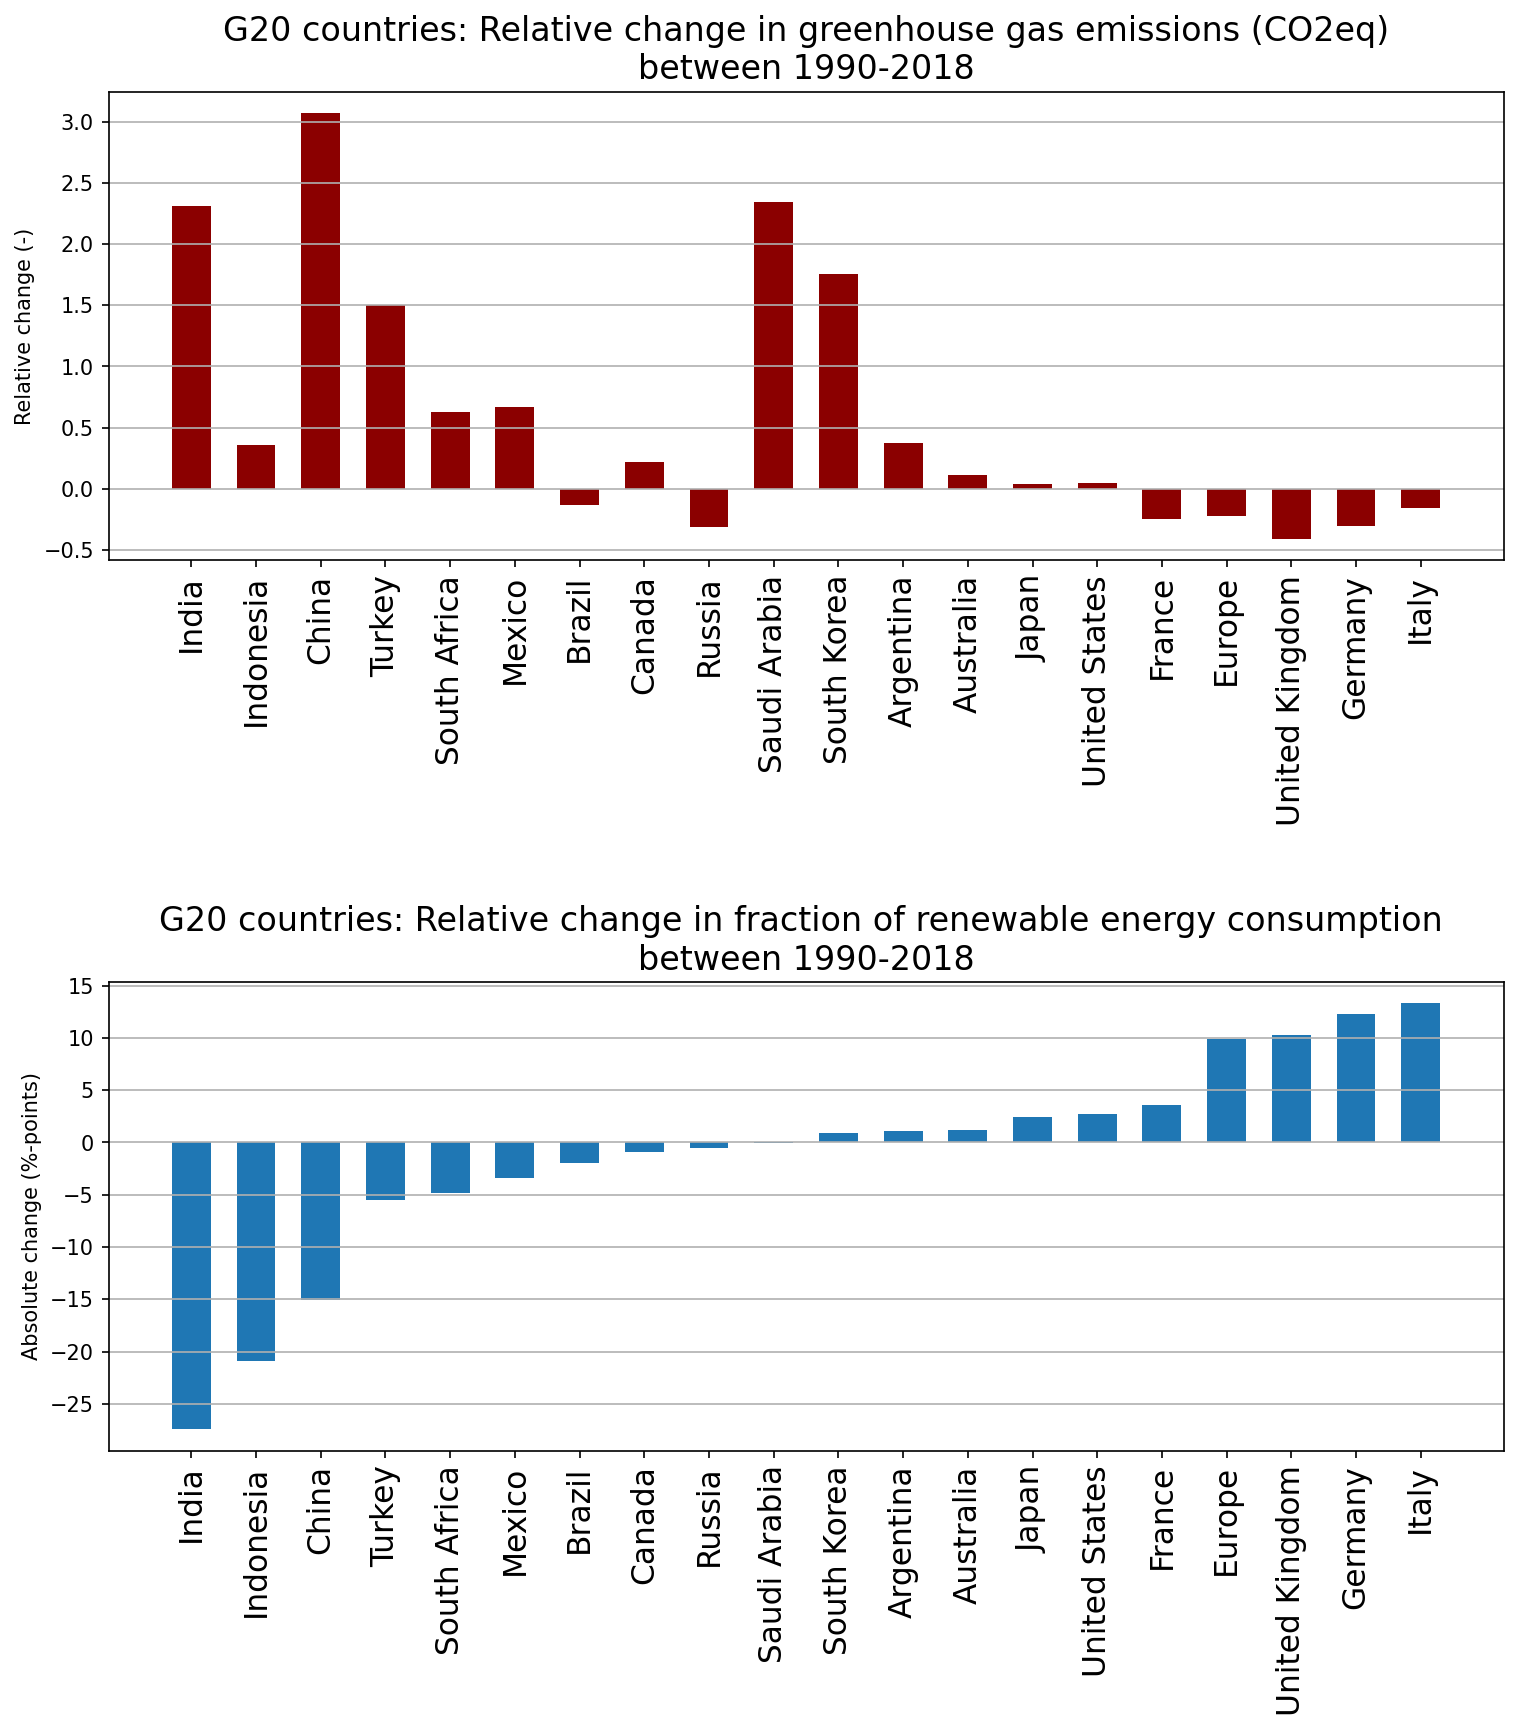

In [228]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,12), dpi=150)
plt.subplots_adjust(hspace=0.9)


axes[0].bar(x=final_comparison.index, 
            height=final_comparison['Emissions diff 1990-2018'],
            width=0.6,
            color='darkred')
axes[0].grid(axis='y')
axes[0].set_title("G20 countries: Relative change in greenhouse gas emissions (CO2eq)\nbetween 1990-2018",
                 fontsize = 16)
axes[0].set_ylabel("Relative change (-)")
axes[0].xaxis.set_tick_params(labelsize=15, rotation=90)

axes[1].bar(x=final_comparison.index, 
            height=final_comparison['Fraction renewable energy diff 1990-2018'],
            width=0.6)
axes[1].grid(axis='y')
axes[1].set_title("G20 countries: Relative change in fraction of renewable energy consumption \nbetween 1990-2018",
                 fontsize=16)
axes[1].set_ylabel("Absolute change (%-points)")
axes[1].xaxis.set_tick_params(labelsize=15, rotation=90)

plt.show()

#### Interestingly enough, not all G20 countries that signed the Paris Agreement actually have raised their relative consumption of renewable energy. For China and India this is possibly explained due to a general explosion in total energy demand. 


Rising consumption of renewable energy does not always mean a relative renewable energy source reliance! The biggest changes are arguably made with employing renewable energy for new demands, so it is important that rising total energy demand is met with renewable supply.

Conclusion and discussion: We are talking of course about G20 countries, so the argument that the diversity of available energy sources in countries at the lower end of the renewable energy consumption ranking are slim does not uphold. These are rich countries with a lot of resources at their disposal. Questions arise about scalability of renewable sources over the last decades. For example, China's explosive rise in demand is apparantly not met by a renewable energy industry that is as scalable as the fossil fuel industry. Is it then a question of not enough willpower? Or are the rising demands of the new Chinese middle class no match for the stalling development of renewable energy technologies? 

Arguably, Western countries e.g. UK, Europe as a whole, and USA had already undergone the economic boom that characterizes the other members, which puts them in a better position to diversify their energy sources as opposed since they do not have to meet demands of a new middle class.

In general it can be said that a relative increase in renewable energy consumption goes hand in hand with a decrease in greenhouse gas emission. The reason for this phenomenon arguably lies in e.g. willpower and a lack of scalability of the renewable energy supply.

Sources:

OECD (2022), Renewable energy (indicator). doi: 10.1787/aac7c3f1-en (Accessed on 15 June 2022)

OECD (2022), Primary energy supply (indicator). doi: 10.1787/1b33c15a-en (Accessed on 15 June 2022)

EPA (US Environmental Protection Agency) (2022), Sources of Greenhouse Gas Emissions, https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions (Accessed on 16 June 2022)